- 머신러닝 저장소 - 3위 와인데이터
- 와인의 질, 컬러, 알콜 도수 등을 측정 -> 원산지(3군데)를 측정하는 문제

In [11]:
wine = pd.read_csv('wine.data', header=None)
wine.shape

(178, 14)

In [12]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
x = wine.iloc[:, 1:]
pca = PCA(n_components=2).fit(x)
wine_pca = pca.transform(x)# 주성분 2개 추출
km = KMeans(n_clusters=3).fit(wine_pca)# 3개로 그룹화
group = km.predict(wine_pca)

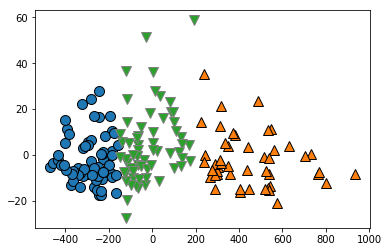

In [14]:
l = mglearn.discrete_scatter(wine_pca[:,0], wine_pca[:,1], group)

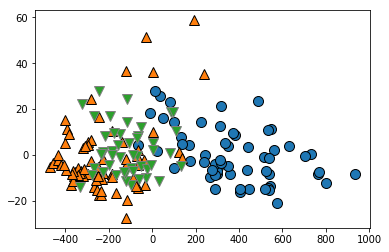

In [15]:
l = mglearn.discrete_scatter(wine_pca[:,0], wine_pca[:,1], wine.iloc[:, 0])

### ========================================================================

### 대출상환 여부
1. get_dummy()로 purpose 원핫 인코딩
1. PCA로 2차원으로 축소
1. K-Means (2개)로 그룹화
1. 산점도로 출력

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn

In [2]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [10]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0


In [3]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [6]:
loans = loans.dropna()
loans_hot = pd.get_dummies(loans)

In [7]:
pca = PCA(n_components=2).fit(loans_hot)
x_pca = pca.transform(loans_hot) # 주성분 2개 추출
km = KMeans(n_clusters=2).fit(x_pca) # 2개로 그룹화
group = km.predict(x_pca)

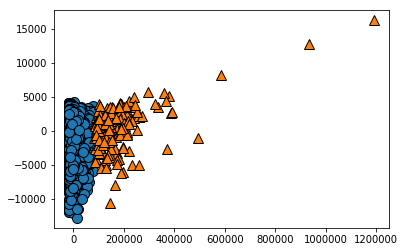

In [8]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], group) # 예측

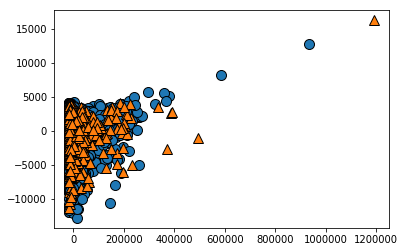

In [9]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], loans.iloc[:,-1]) # 실제로 돈 안갚는 사람